# Math 428 - Homework for 05/01/19

## Problem 25.16

$$m\frac{d^2x}{dt^2}+c\frac{dx}{dt}+kx=0$$

With $m=20kg$, $c=5, 40, 200 Ns/m$, $k=20N/m$, $x'(0)=0$, $x(0)=1m$. Solve for $0\leq t\leq 15$.

$$\frac{dx}{dt}=z$$

$$\frac{d^2x}{dt^2}=\frac{dz}{dt}=\frac{-kx-cz}{m}$$

The maximum step size will be calculated with the following formula:

$$h_{max}=\frac{-2}{\frac{\partial f}{\partial y}}$$

$$h_{max}=\frac{-2}{\frac{-k-m}{c}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Euler method for two simulataneous ODEs
def euler_ode(dy_dx, dz_dx, initial=[0, 0], bounds=[0, 0], h=0.1, c_val=5):
    x, y = [initial[0]], [initial[1]]
    for i in range(1, int((bounds[1] - bounds[0]) / h) + 1):
        x_n, y_n = x[-1], y[-1]
        
        k1 = h * dy_dx(x_n, y_n)
        m1 = h * dz_dx(x_n, y_n, c_val)
        
        x.append(x_n + k1)
        y.append(y_n + m1)
        
    return x, y

In [3]:
# Function definition of dx/dt
def dx_dt(x, z):
    return z

# Function definition of dx2/dt2
def dz_dt(x, z, c):
    return (-20 * x - c * z) / 20

# Return the maximum step size necessary for numeric stability
def calc_max_h(k, m, c_list):
    if isinstance(c_list, list):
        return [-2 / ((-k - m) / c) for c in c_list]
    return (-2 / ((-k - m) / c))

## Variable declarations for $k$, $m$, and all three $c$ and $h$ values

In [4]:
k, m, c1, c2, c3 = 20, 20, 5, 40, 200
h_max_5, h_max_40, h_max_200 = calc_max_h(k, m, [c1, c2, c3])
t_end = 25

## Solution to the differential equation with $c=5$

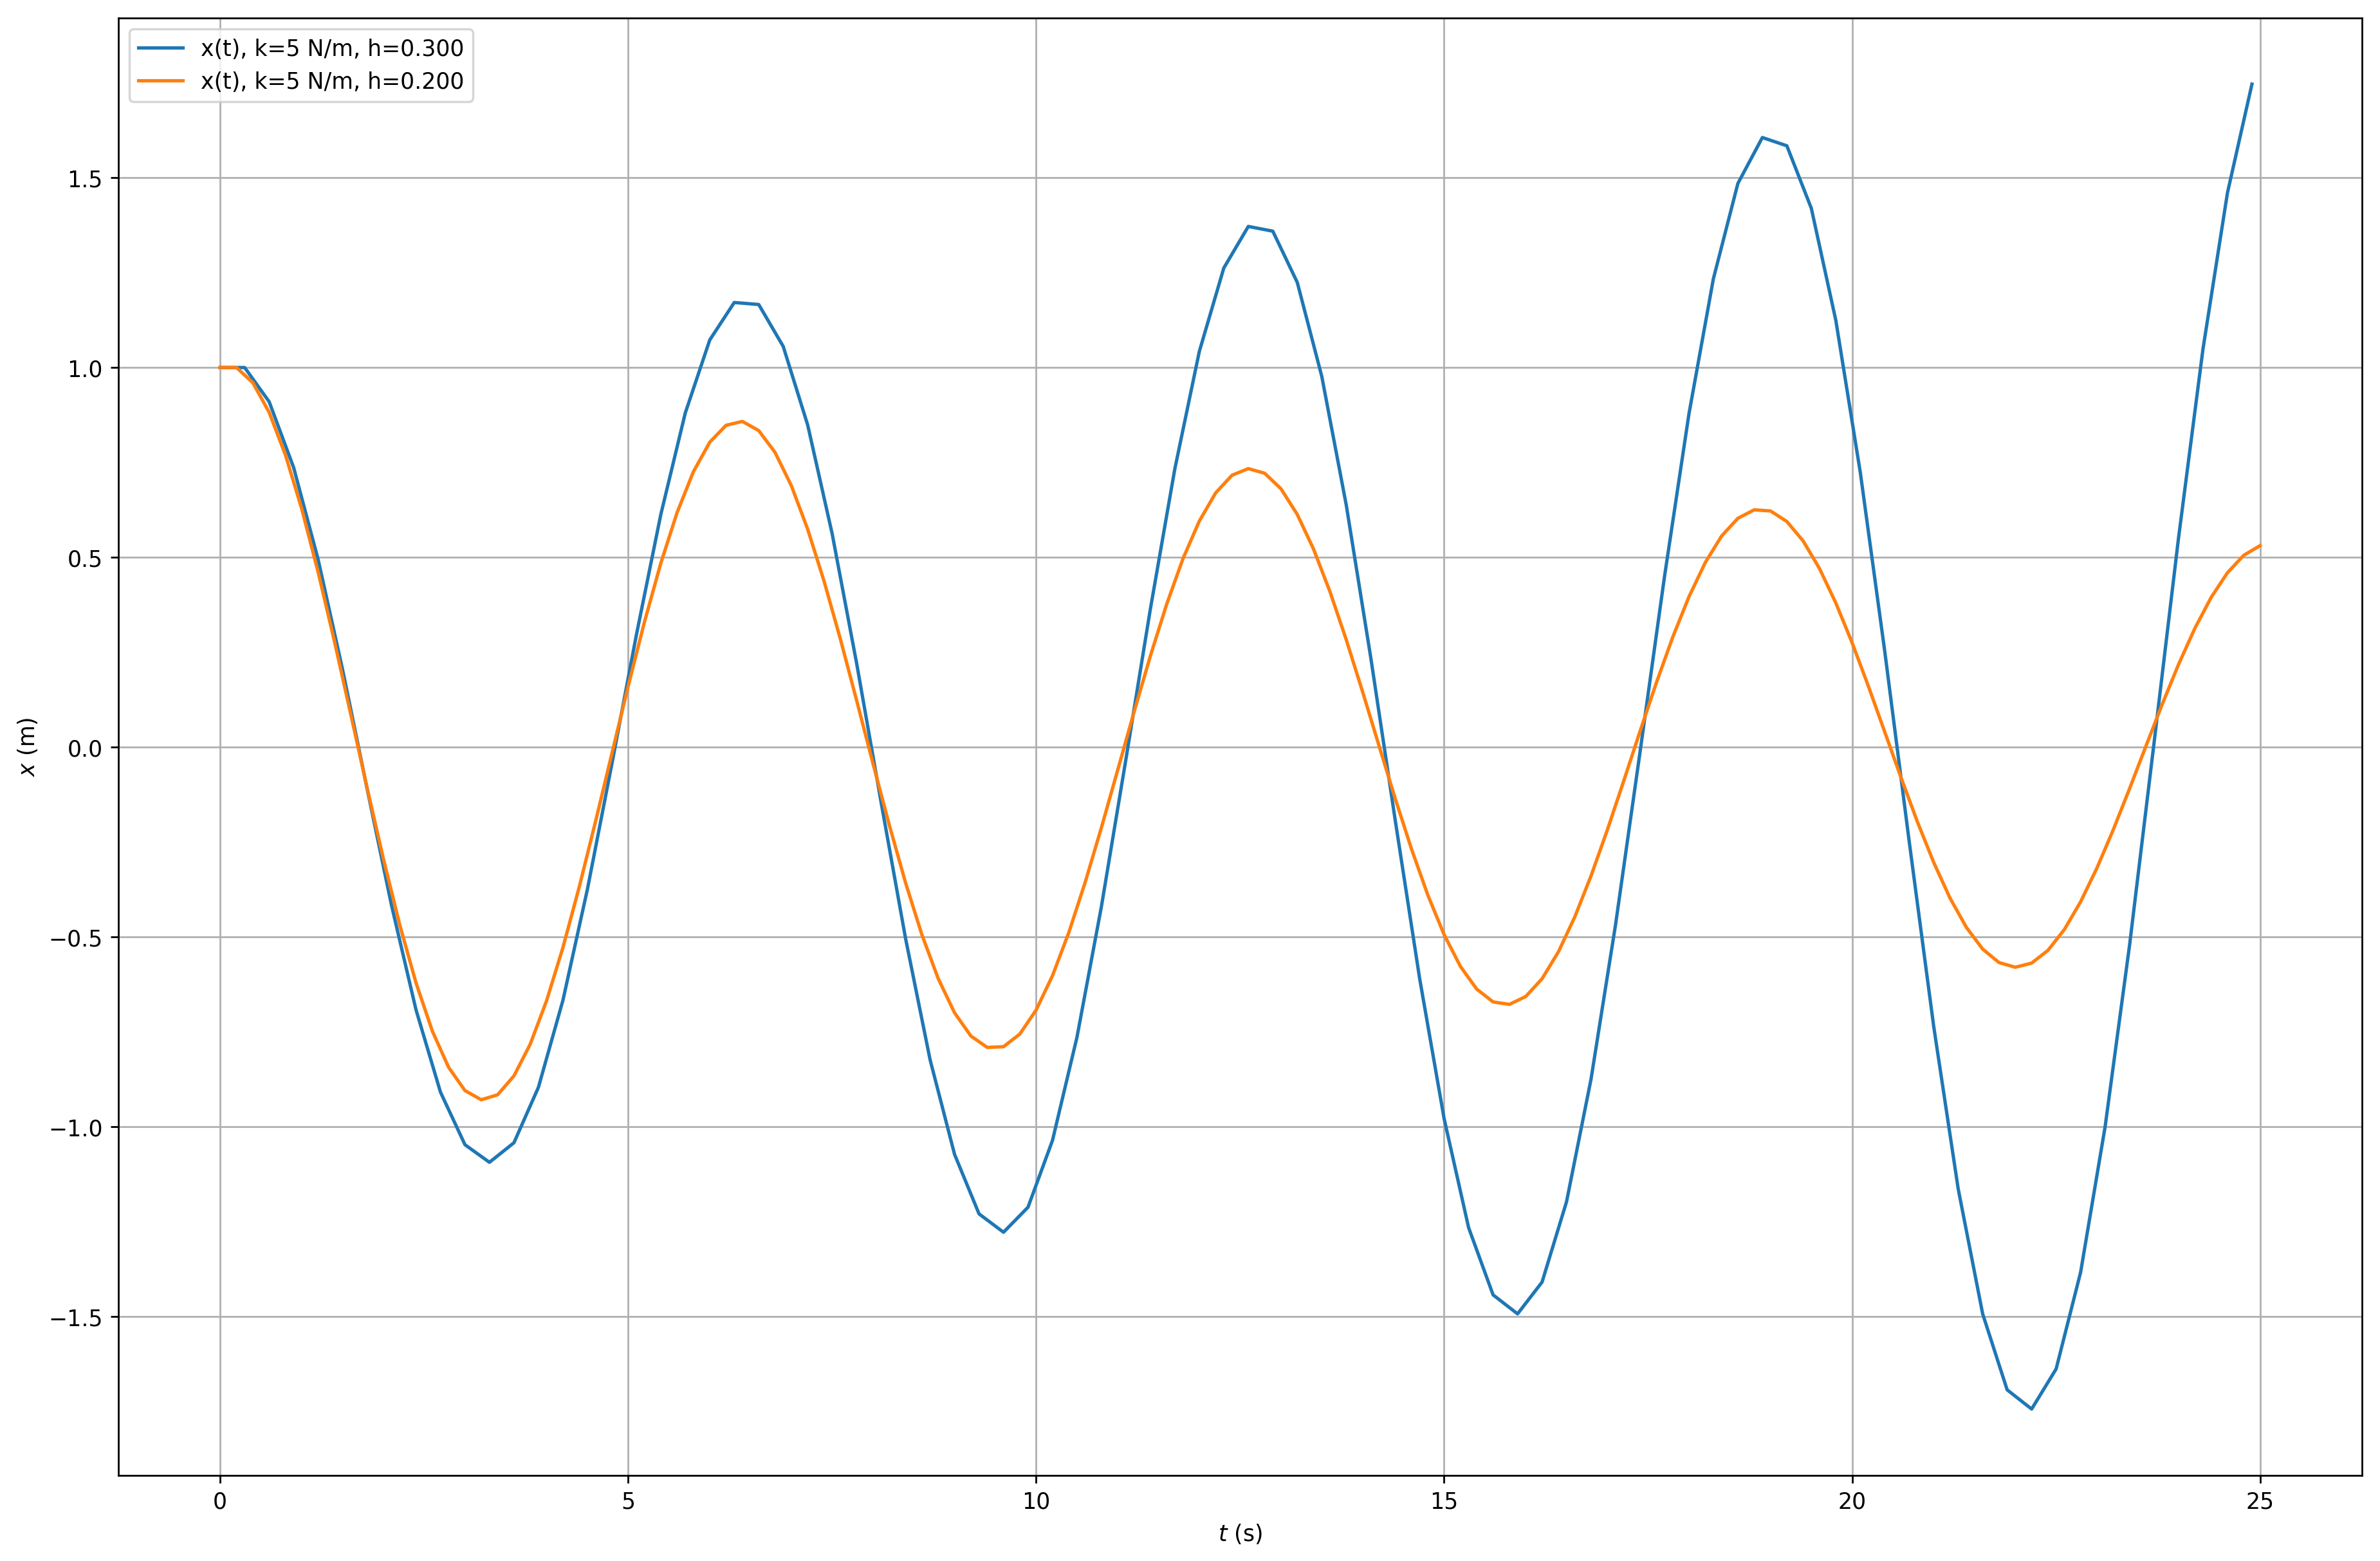

In [5]:
# Generate the time-axis, c1
h_unstable  = h_max_5 * 1.2
h_stable    = h_max_5 * 0.8
t_unstable = np.arange(0, t_end + h_unstable, h_unstable)
t_stable   = np.arange(0, t_end + h_stable, h_stable)

# Numerically solve the ODEs
x_unstable, _ = euler_ode(dx_dt, dz_dt, [1, 0], [0, t_end], h_unstable, c1)
x_stable, _   = euler_ode(dx_dt, dz_dt, [1, 0], [0, t_end], h_stable, c1)

# Plot the resulting solutions
plt.figure(figsize=(18, 12), dpi=250)
plt.plot(t_unstable[:len(x_unstable)], x_unstable, label="x(t), k=%d N/m, h=%0.3f" % (c1, h_unstable))
plt.plot(t_stable[:len(x_stable)], x_stable, label="x(t), k=%d N/m, h=%0.3f" % (c1, h_stable))
plt.xlabel("$t$ (s)")
plt.ylabel("$x$ (m)")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

## Solution to the differential equation with $c=40$

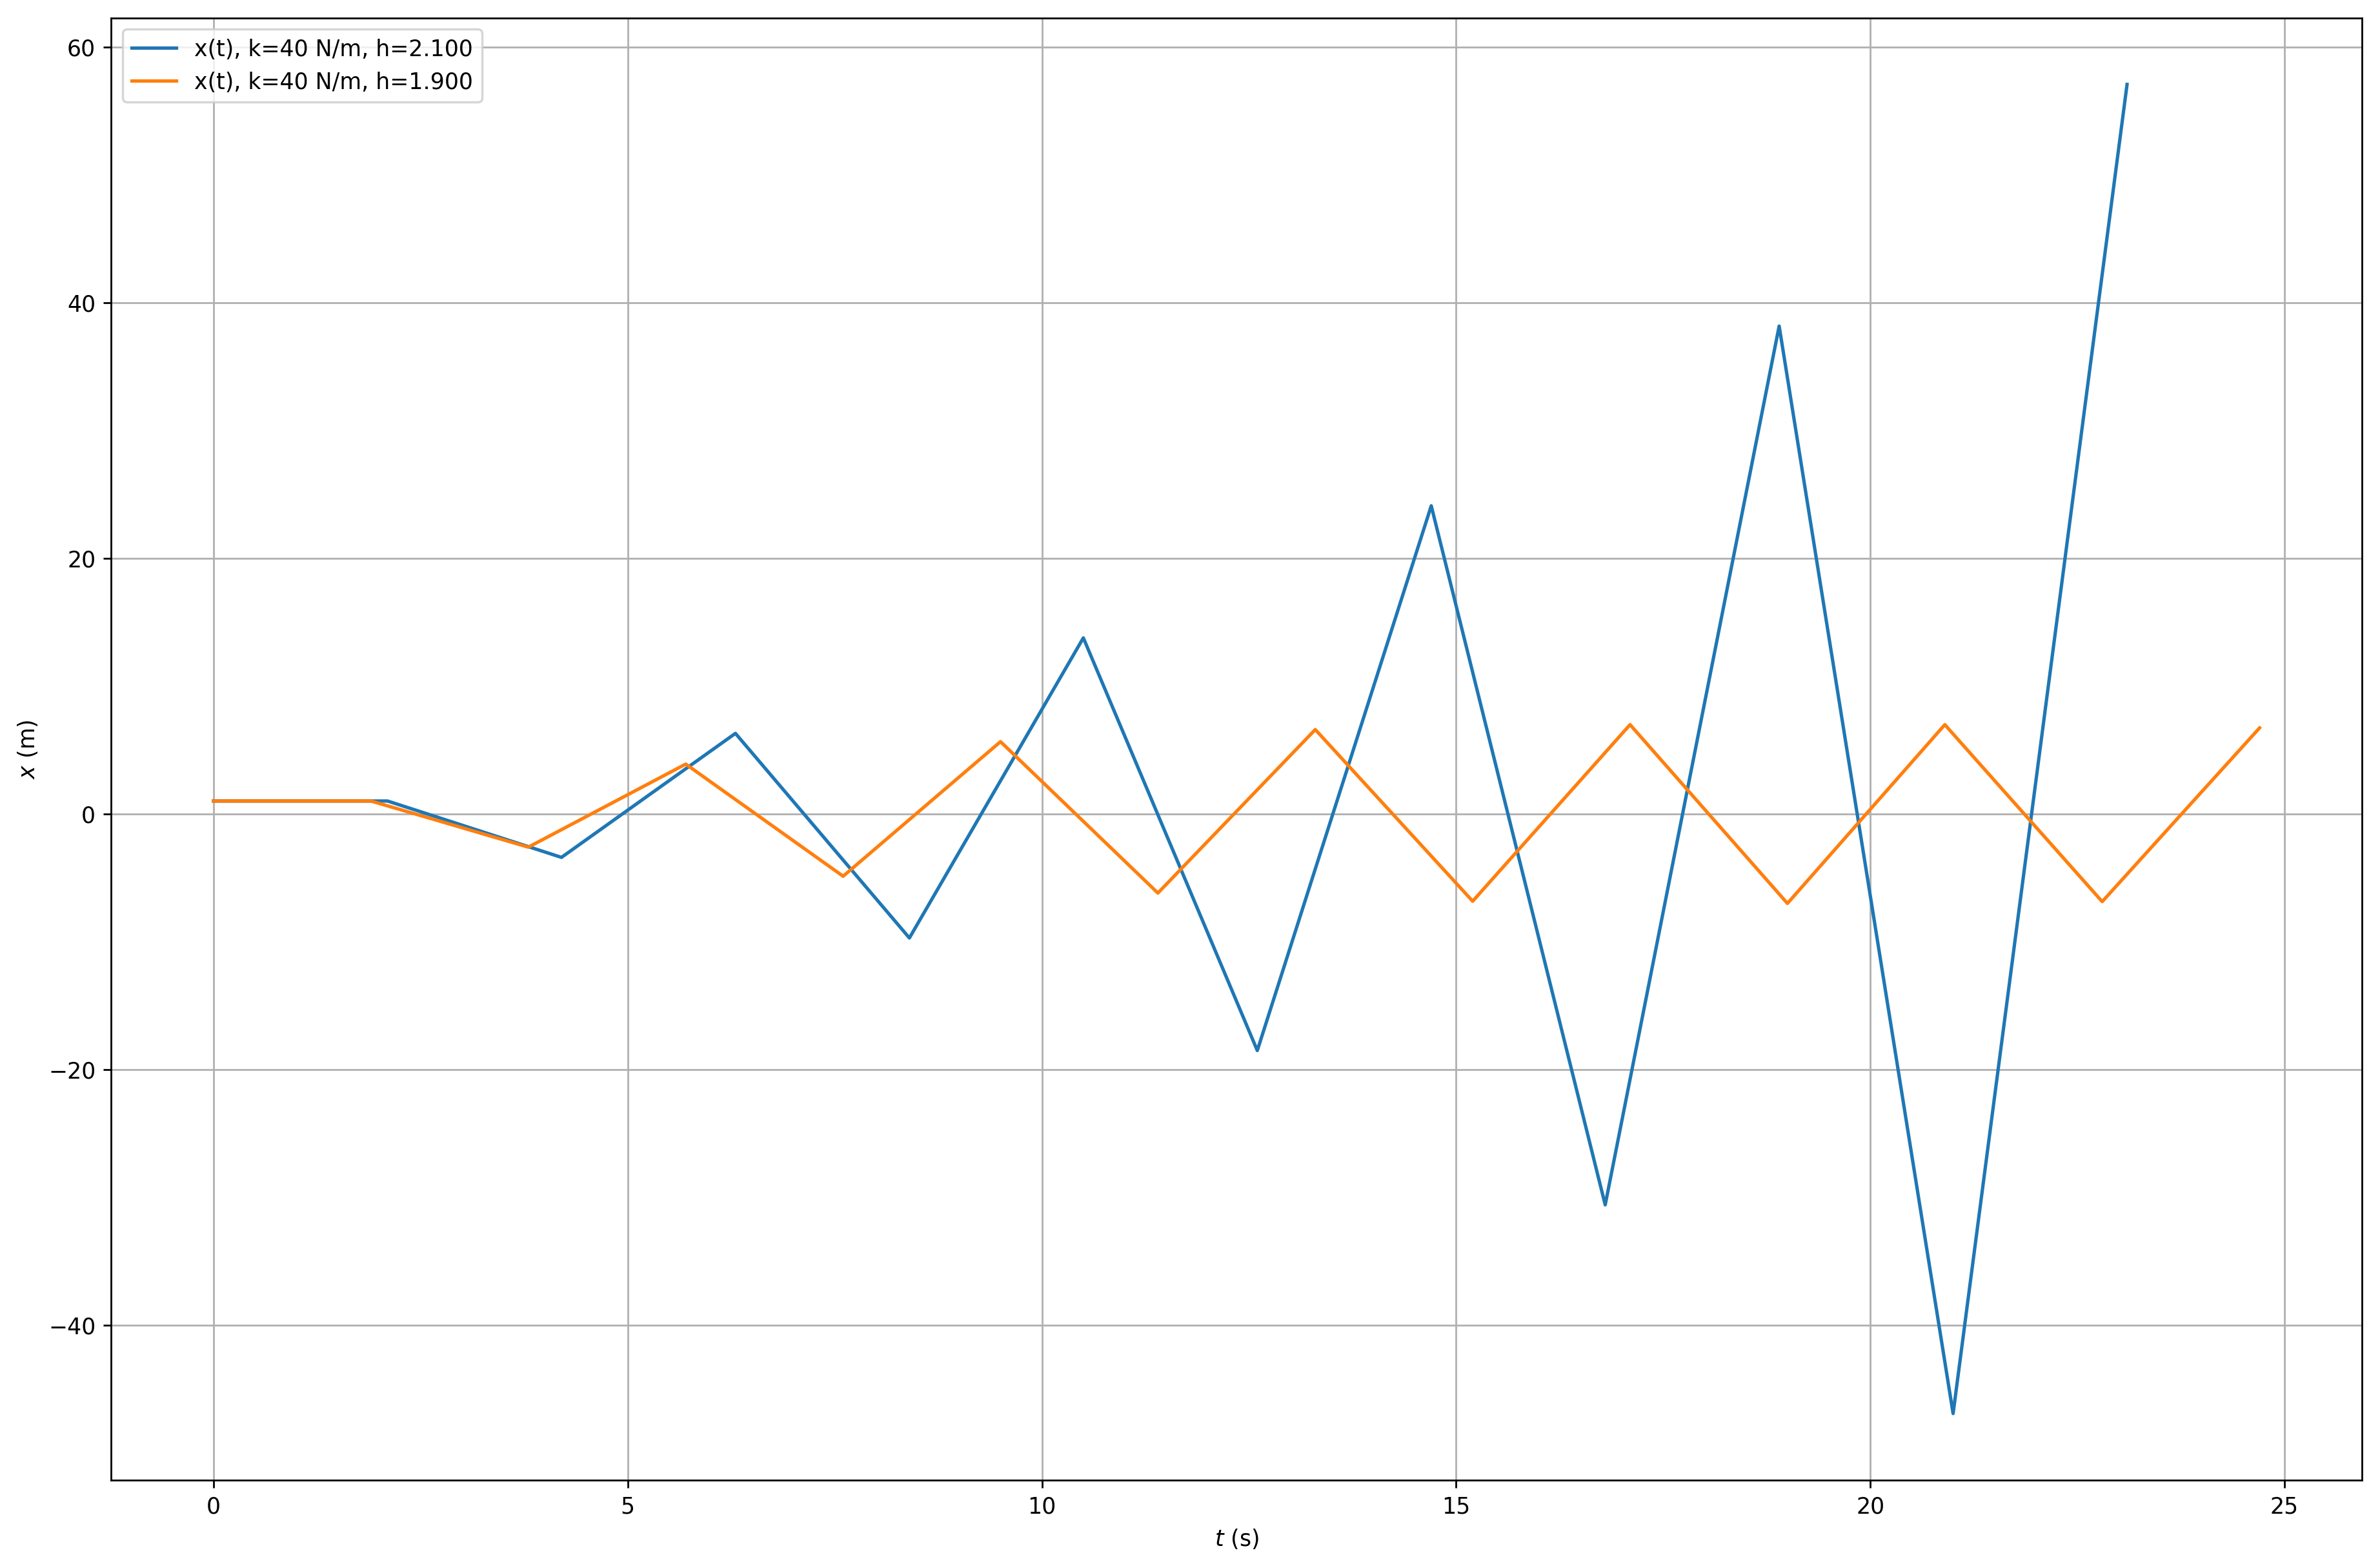

In [6]:
# Generate the time-axis, c1
h_unstable  = h_max_40 * 1.05
h_stable    = h_max_40 * 0.95
t_unstable = np.arange(0, t_end + h_unstable, h_unstable)
t_stable   = np.arange(0, t_end + h_stable, h_stable)

# Numerically solve the ODEs
x_unstable, _ = euler_ode(dx_dt, dz_dt, [1, 0], [0, t_end], h_unstable, c2)
x_stable, _   = euler_ode(dx_dt, dz_dt, [1, 0], [0, t_end], h_stable, c2)

# Plot the resulting solutions
plt.figure(figsize=(18, 12), dpi=250)
plt.plot(t_unstable[:len(x_unstable)], x_unstable, label="x(t), k=%d N/m, h=%0.3f" % (c2, h_unstable))
plt.plot(t_stable[:len(x_stable)], x_stable, label="x(t), k=%d N/m, h=%0.3f" % (c2, h_stable))
plt.xlabel("$t$ (s)")
plt.ylabel("$x$ (m)")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

## Solution to the differential equation with $c=200$

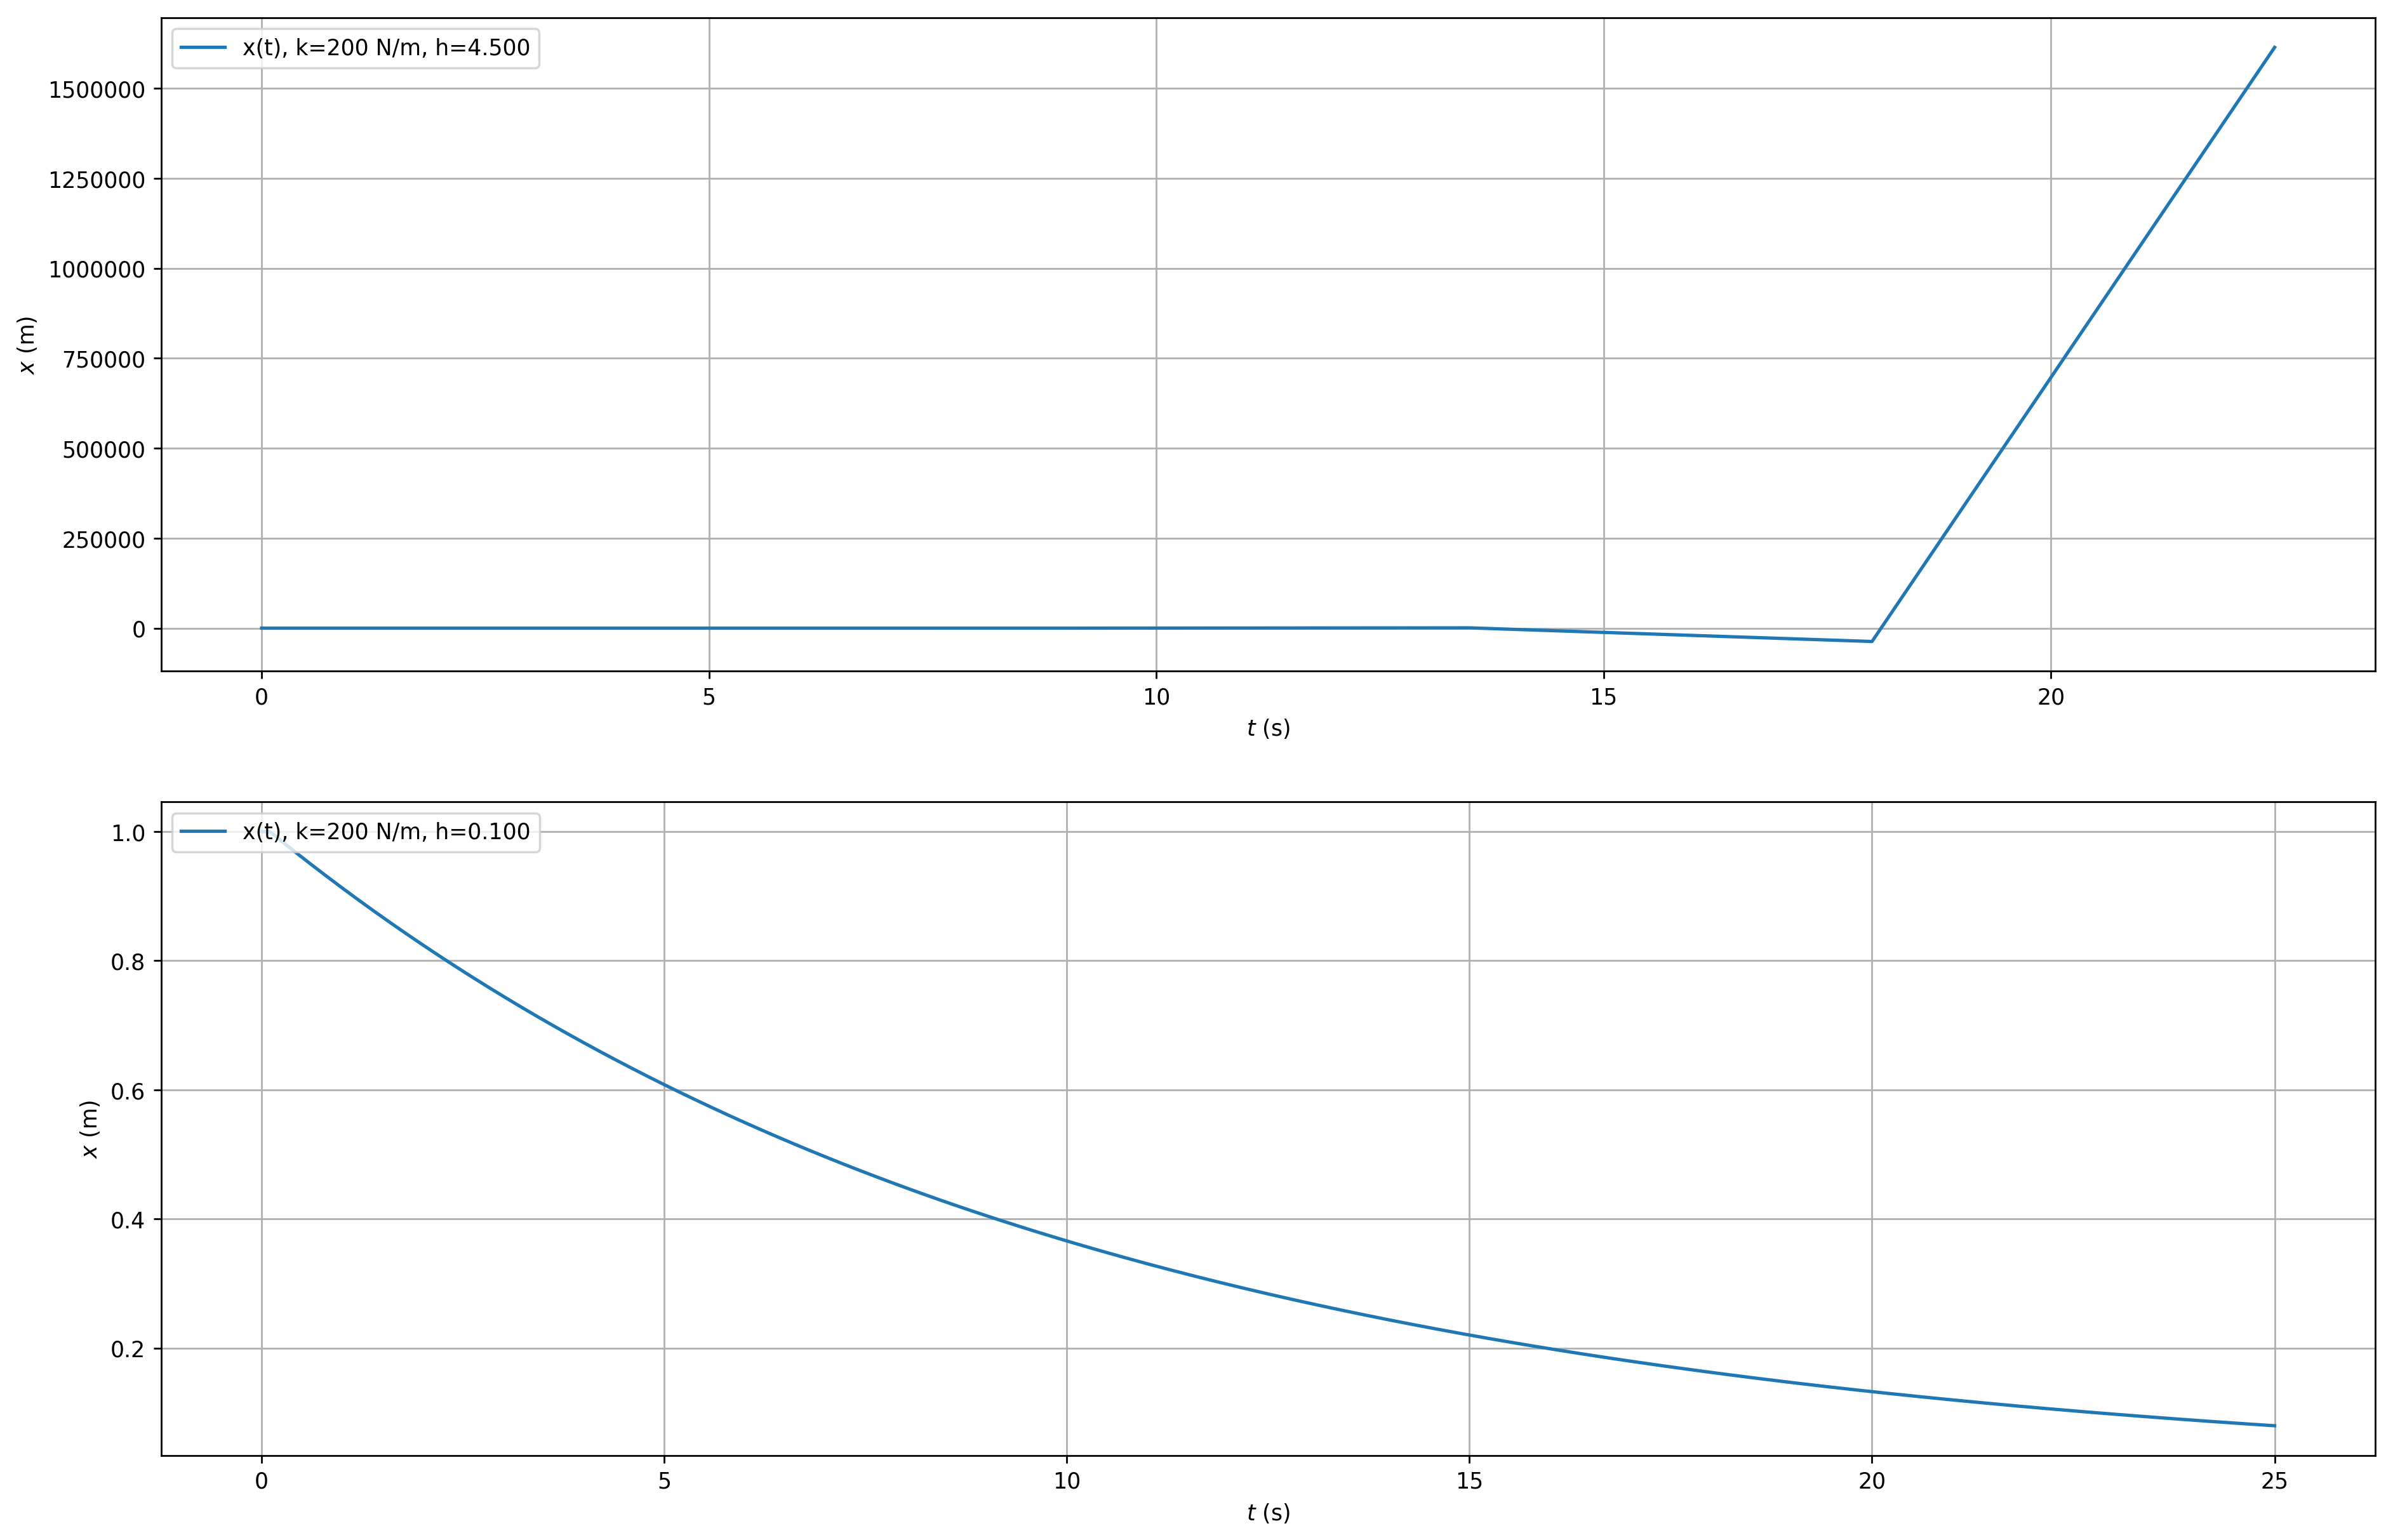

In [7]:
# Generate the time-axis, c1
h_unstable  = h_max_200 * 0.45
h_stable    = h_max_200 * 0.01
t_unstable = np.arange(0, t_end + h_unstable, h_unstable)
t_stable   = np.arange(0, t_end + h_stable, h_stable)

# Numerically solve the ODEs
x_unstable, _ = euler_ode(dx_dt, dz_dt, [1, 0], [0, t_end], h_unstable, c3)
x_stable, _   = euler_ode(dx_dt, dz_dt, [1, 0], [0, t_end], h_stable, c3)

# Plot the resulting solutions
plt.figure(figsize=(18, 12), dpi=250)
plt.subplot(211)
plt.plot(t_unstable[:len(x_unstable)], x_unstable, label="x(t), k=%d N/m, h=%0.3f" % (c3, h_unstable))
plt.xlabel("$t$ (s)")
plt.ylabel("$x$ (m)")
plt.grid(True)
plt.legend(loc='upper left')
plt.subplot(212)
plt.plot(t_stable[:len(x_stable)], x_stable, label="x(t), k=%d N/m, h=%0.3f" % (c3, h_stable))
plt.xlabel("$t$ (s)")
plt.ylabel("$x$ (m)")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

All of the above graphs are plotted on an expanded range of time to allow the stability or instability to be more clearly demonstrated. By calculating the maximum step size required for numerical stability, the stability of each numerical solution is shown. I slightly deviated the step size from this maximum value to allow the effects to become more clear. In all unstable cases, the error accumulates over time. On the other hand, even if the stable solution is far off from the correct answer, as is the case in part (b), the error does not accumulate between steps and _eventually_ the result will converge.